In [5]:
from collections import Counter
from io import BytesIO

import arxiv_dataset
import pandas as pd
from pypdf import PdfReader

paper_b = arxiv_dataset.get("2301.06511")
paper = BytesIO(paper_b)

len(paper_b)

3255008

In [6]:
# print(PdfDocument(paper).extract_text())
# ArXiVDataset.query_metadata("2301.06511")

print("# Suspicious monograms")
# bag_of_chars(PdfDocument(paper).extract_text())

reader = PdfReader(paper)

page = reader.pages[3]
# print(page.extract_text())

font_counters = dict()

def visitor_body(text, _cm, _tm, font_dict, _font_size):
    # font = font_dict.get("/Subtype", "") +
    font = font_dict.get("/BaseFont", "") if font_dict else "Unknown"
    # if font not in font_counters: font_counters[font] = Counter()
    font_counters.setdefault(font, Counter()).update(Counter(text))

page.extract_text(visitor_text=visitor_body)

df = pd.DataFrame(font_counters)
print(font_counters)


# Suspicious monograms
{'Unknown': Counter(), '/TGHEMB+NimbusRomNo9L-Regu': Counter({' ': 670, 'e': 462, 't': 314, 'a': 298, 'o': 294, 'n': 272, 'i': 255, 'r': 249, 's': 214, 'd': 189, 'h': 135, 'c': 128, 'l': 126, 'u': 97, 'm': 90, '\n': 79, 'p': 72, 'g': 71, 'f': 69, '.': 63, 'b': 59, ',': 58, 'w': 50, 'v': 46, '0': 35, 'y': 35, '-': 32, 'k': 24, ':': 22, '(': 22, ')': 22, 'T': 17, '5': 17, '1': 14, 'I': 12, 'z': 10, 'S': 10, 'B': 8, '2': 8, '9': 7, '3': 7, 'W': 7, 'ﬁ': 7, 'A': 6, 'E': 6, '6': 6, '8': 6, '4': 6, 'G': 6, 'L': 5, '[': 5, ']': 5, 'F': 5, 'P': 4, 'C': 4, '7': 4, 'U': 4, 'x': 4, '”': 4, 'R': 3, 'D': 3, 'j': 3, 'M': 2, ';': 2, 'q': 2, '’': 2, 'V': 2, 'Y': 1, 'N': 1}), '/QTLRKE+NimbusRomNo9L-ReguItal': Counter({' ': 33, 'o': 22, 'i': 20, 'a': 19, 'e': 17, 't': 16, ':': 12, 'c': 10, ',': 10, 'n': 10, 's': 10, 'p': 8, 'm': 7, 'v': 6, '\n': 6, 'r': 6, 'L': 5, 'g': 5, 'd': 5, 'z': 5, 'G': 4, 'k': 4, 'b': 4, 'h': 4, 'u': 4, '0': 4, '.': 4, 'N': 3, '¨': 3, 'ı': 3, 'l': 3, 'f': 3,

In [7]:
from pprint import pprint

reader = PdfReader(paper)

page = reader.pages[3]
# print(page.extract_text())

def visitor_body(text, cm, tm, font_dict, font_size):
    if len(text) > 10:
        pprint([text, cm, tm, font_dict, font_size])

page.extract_text(visitor_text=visitor_body)

['TABLE I: Performance metrics on model used (averaged over all validation '
 'folds). Both models used augmented data for\n',
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 48.959, 729.631],
 {'/BaseFont': '/TGHEMB+NimbusRomNo9L-Regu',
  '/Encoding': IndirectObject(476, 0, 128643272017104),
  '/FirstChar': 1,
  '/FontDescriptor': IndirectObject(502, 0, 128643272017104),
  '/LastChar': 180,
  '/Subtype': '/Type1',
  '/Type': '/Font',
  '/Widths': IndirectObject(480, 0, 128643272017104)},
 9.9626]
['training. Comparison with performance of the rule-based model (',
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 48.959, 717.6759999999999],
 {'/BaseFont': '/TGHEMB+NimbusRomNo9L-Regu',
  '/Encoding': IndirectObject(476, 0, 128643272017104),
  '/FirstChar': 1,
  '/FontDescriptor': IndirectObject(502, 0, 128643272017104),
  '/LastChar': 180,
  '/Subtype': '/Type1',
  '/Type': '/Font',
  '/Widths': IndirectObject(480, 0, 128643272017104)},
 9.9626]
[' condition) on the same dat

'TABLE I: Performance metrics on model used (averaged over all validation folds). Both models used augmented data for\ntraining. Comparison with performance of the rule-based model ( Na¨ıveL condition) on the same dataset.\nModule Model Hyperparameters Performance\nTiming GRULookback: 5,activation: sigmoid,\nbatch size: 16, dropout: 0.0,\nloss function: focal,optimizer: AdamMacro Accuracy : 0.95, Precision : 0.52, Recall : 0.51, F1:0.50\nMargin Accuracy : 0.95, Precision : 0.59, Recall : 0.76, F1:0.65\nBC Prediction Deviation : 0.83\nType GRULookback: 10, activation: sigmoid,\nbatch size: 32, dropout: 0.2,\nloss function: MSE, optimizer: SGDMacro Accuracy : 0.64, Precision : 0.37,\nRecall : 0.39, F1:0.35\nTiming Na¨ıveL Ward and Tsukahara [55]Macro Accuracy : 0.95, Precision : 0.48,\nRecall : 0.50, F1:0.49\na dropout layer and a ﬁnal dense layer. Each model was either\ntrained on the original or the augmented dataset, considering\nvarying previous timesteps, i.e. lookback sizes (5, 10 

In [8]:
df.sort_index().head()

,Unknown,/TGHEMB+NimbusRomNo9L-Regu,/QTLRKE+NimbusRomNo9L-ReguItal,/RVLVIA+NimbusRomNo9L-Medi,/WGPEOY+CMR10,/QSBUAV+CMSY10,/THWVNF+CMMI10,/UXBWCM+CMMI7
\n,NaN,79.0,6.0,10.0,1.0,NaN,NaN,4.0
,NaN,670.0,33.0,36.0,1.0,NaN,1.0,NaN
(,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN
),NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN
",",NaN,58.0,10.0,NaN,NaN,NaN,1.0,NaN


In [9]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Replace missing values with 0 in column: 'None'
    df = df.fillna(0)
    # Change column type to object for column: 'None'
    df = df.astype(int)
    df['char'] = df.index
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Unknown,/TGHEMB+NimbusRomNo9L-Regu,/QTLRKE+NimbusRomNo9L-ReguItal,/RVLVIA+NimbusRomNo9L-Medi,/WGPEOY+CMR10,/QSBUAV+CMSY10,/THWVNF+CMMI10,/UXBWCM+CMMI7,char
T,0,17,2,6,0,0,0,0,T
A,0,6,2,4,0,0,0,0,A
B,0,8,1,2,0,0,1,0,B
L,0,5,5,0,0,0,0,0,L
E,0,6,1,2,0,0,0,0,E


In [10]:
from string import ascii_letters, printable, punctuation

"""
Cell generated by Data Wrangler.
"""

def clean_data(df_clean):
    def char_category(char):
        match char:
            case char if char in ascii_letters:
                return "ascii_letters"
            case char if char in punctuation:
                return "punctuation"
            case char if char in printable:
                return "other printable"
            case _:
                return "other"

    df_clean.insert(9, "char_category", df_clean.apply(lambda row: char_category(row["char"]), axis=1))
    return df_clean

df_clean_1 = clean_data(df_clean.copy())
df_clean_1.groupby("char_category").sum()

,Unknown,/TGHEMB+NimbusRomNo9L-Regu,/QTLRKE+NimbusRomNo9L-ReguItal,/RVLVIA+NimbusRomNo9L-Medi,/WGPEOY+CMR10,/QSBUAV+CMSY10,/THWVNF+CMMI10,/UXBWCM+CMMI7,char
char_category,,,,,,,,,
ascii_letters,0,3674,220,335,0,0,6,19,TABLEIPerfomanctisdluvghCpwbWkyzRUxMSGDFqVYNjH
other,0,13,6,1,1,2,0,0,ﬁ’”¨ı∆−
other printable,0,859,50,51,8,0,1,4,\n0952176834
punctuation,0,231,26,3,3,2,2,0,":().-,[];=|/"


In [11]:
# df_clean_1 = df_clean['character_type'] = df_clean.apply(lambda row: 1 if row['index'] in list("ABCabc") else 0, axis=1)
# df_clean_1.head()
# df.groupby(df['index'])


<Axes: xlabel='char_category'>

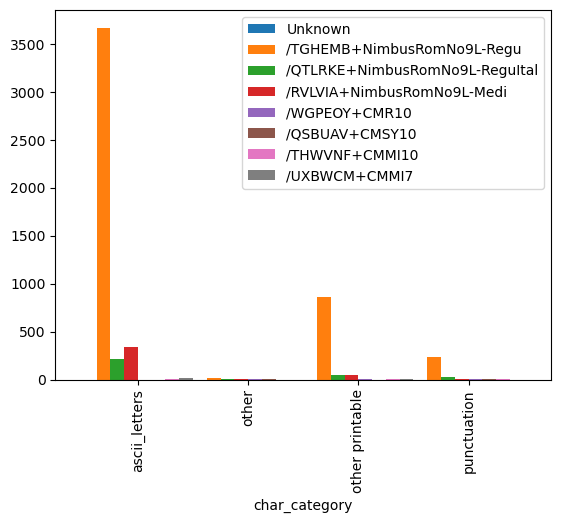

In [12]:
df_clean_1.groupby("char_category").sum().plot.bar(stacked=False, width=1)